References and todo
- https://docs.python.org/3/library/glob.html
- https://docs.python.org/3/library/pathlib.html#module-pathlib
- https://fda.readthedocs.io/en/latest/modules/autosummary/skfda.representation.basis.BSplineBasis.html

To-do: batch processing and fda


In [1]:
from pathlib import Path
import pandas as pd

sample = "jrw006_s1"
img_output = Path("/mnt/d/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/topology_results")
obj = img_output.glob("*.csv")
file_list = list(obj)  # Renamed the variable to file_list
print(file_list[1]) 

# demo file name manipulation # 
file_A = file_list[25]
df = pd.read_csv(file_A)
print(f"File {file_A.name} was successfully loaded")
file = file_A.stem
parts = file.split("_")

## check
print(parts)
df.describe
len(parts)
# df.plot()

/mnt/d/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/topology_results/chunk_Z0-256_Y0-256_X1200-1456_filtration.csv
File chunk_Z0-256_Y1680-1936_X1200-1456_filtration.csv was successfully loaded
['chunk', 'Z0-256', 'Y1680-1936', 'X1200-1456', 'filtration']


5

In [2]:
import re
from pathlib import Path
import pandas as pd

sample = "jrw006_s1"
img_output = Path("/mnt/d/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/topology_results")
file_list = list(img_output.glob("*.csv"))

metadata_log = {}  # Dictionary to store metadata
master_df = pd.DataFrame() #Dataframe to store raw_ec data.

for file_path in file_list:
    df = pd.read_csv(file_path)
    file_stem = file_path.stem

    z_match = re.search(r"Z(\d+-\d+)", file_stem)
    y_match = re.search(r"Y(\d+-\d+)", file_stem)
    x_match = re.search(r"X(\d+-\d+)", file_stem)

    if z_match and y_match and x_match:
        z_range = z_match.group(1)
        y_range = y_match.group(1)
        x_range = x_match.group(1)

        chunk_id = f"Z{z_range}_Y{y_range}_X{x_range}"

        metadata_log[chunk_id] = {
            "sample": sample,
            "z_range": z_range,
            "y_range": y_range,
            "x_range": x_range,
            "file_path": str(file_path), #store file path as string.
        }
        master_df[chunk_id] = df["Raw EC (3D)"]

    else:
        print(f"Skipping {file_path.name} due to missing Z, Y, or X range.")

master_df['Filtration Value'] = df['Filtration Value'] #add filtration value column.
print(master_df.head())
print(metadata_log)

/tmp/ipykernel_128271/1465697664.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[chunk_id] = df["Raw EC (3D)"]
/tmp/ipykernel_128271/1465697664.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[chunk_id] = df["Raw EC (3D)"]
/tmp/ipykernel_128271/1465697664.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

   Z0-256_Y0-256_X0-256  Z0-256_Y0-256_X1200-1456  Z0-256_Y0-256_X1440-1691  \
0                    12                       255                       102   
1                    12                       255                       102   
2                    12                       255                       102   
3                    12                       252                       102   
4                    12                       248                       101   

   Z0-256_Y0-256_X1680-1691  Z0-256_Y0-256_X240-496  Z0-256_Y0-256_X480-736  \
0                         3                     146                     136   
1                         3                     146                     136   
2                         3                     146                     136   
3                         3                     146                     136   
4                         3                     146                     136   

   Z0-256_Y0-256_X720-976  Z0-256_Y0-256_X960-1216

/tmp/ipykernel_128271/1465697664.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[chunk_id] = df["Raw EC (3D)"]
/tmp/ipykernel_128271/1465697664.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[chunk_id] = df["Raw EC (3D)"]
/tmp/ipykernel_128271/1465697664.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fr

In [5]:
### more efficient data frame ###
import re
from pathlib import Path
import pandas as pd

sample = "jrw006_s1"
img_output = Path("/mnt/d/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/topology_results")
file_list = list(img_output.glob("*.csv"))

metadata_log = {}
data_frames = []  # List to store individual DataFrames

for file_path in file_list:
    df = pd.read_csv(file_path)
    file_stem = file_path.stem

    z_match = re.search(r"Z(\d+-\d+)", file_stem)
    y_match = re.search(r"Y(\d+-\d+)", file_stem)
    x_match = re.search(r"X(\d+-\d+)", file_stem)

    if z_match and y_match and x_match:
        z_range = z_match.group(1)
        y_range = y_match.group(1)
        x_range = x_match.group(1)

        chunk_id = f"Z{z_range}_Y{y_range}_X{x_range}"

        metadata_log[chunk_id] = {
            "sample": sample,
            "z_range": z_range,
            "y_range": y_range,
            "x_range": x_range,
            "file_path": str(file_path),
        }
        data_frames.append(df[["Raw EC (3D)"]].rename(columns={"Raw EC (3D)": chunk_id})) #append the dataframe, and rename the column.

    else:
        print(f"Skipping {file_path.name} due to missing Z, Y, or X range.")

master_df = pd.concat(data_frames, axis=1)
master_df['Filtration Value'] = df['Filtration Value']

print(master_df.head())
print(metadata_log)

   Z0-256_Y0-256_X0-256  Z0-256_Y0-256_X1200-1456  Z0-256_Y0-256_X1440-1691  \
0                    12                       255                       102   
1                    12                       255                       102   
2                    12                       255                       102   
3                    12                       252                       102   
4                    12                       248                       101   

   Z0-256_Y0-256_X1680-1691  Z0-256_Y0-256_X240-496  Z0-256_Y0-256_X480-736  \
0                         3                     146                     136   
1                         3                     146                     136   
2                         3                     146                     136   
3                         3                     146                     136   
4                         3                     146                     136   

   Z0-256_Y0-256_X720-976  Z0-256_Y0-256_X960-1216

/tmp/ipykernel_128271/2216449767.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df['Filtration Value'] = df['Filtration Value']


In [9]:
import skfda

# Assuming master_df is populated as before

domain_range = [(master_df['Filtration Value'].min(), master_df['Filtration Value'].max())]
grid_points = master_df['Filtration Value'].values

codomain_columns = [col for col in master_df.columns if col != 'Filtration Value']
data_matrix = master_df[codomain_columns].values.T

print(f"data_matrix shape: {data_matrix.shape}")
print(f"grid_points length: {len(grid_points)}")

# Reshape data_matrix to add a third dimension
data_matrix = data_matrix.reshape((data_matrix.shape[0], data_matrix.shape[1], 1))

fd = skfda.FDataGrid(data_matrix, grid_points, domain_range)

print(fd)

data_matrix shape: (363, 25)
grid_points length: 25


TypeError: FDataGrid.__init__() takes from 2 to 3 positional arguments but 4 were given

In [ ]:
from pathlib import Path
import pandas as pd

img_output = Path("/mnt/d/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/topology_results")

if img_output.exists() and img_output.is_dir():
    csv_data = []  # List to store data for each CSV file

    for file_path in img_output.glob("*.csv"):
        try:
            df = pd.read_csv(file_path)
            filename_stem = file_path.stem
            parts = filename_stem.split("_")

            if len(parts) == 5:
                z_range = parts[1]
                y_range = parts[2]
                x_range = parts[3]
                filtration = parts[4]

                z_min, z_max = map(int, z_range[1:].split("-"))
                y_min, y_max = map(int, y_range[1:].split("-"))
                x_min, x_max = map(int, x_range[1:].split("-"))

                csv_data.append({
                    "file_path": file_path,
                    "filename_stem": filename_stem,
                    "z_min": z_min,
                    "z_max": z_max,
                    "y_min": y_min,
                    "y_max": y_max,
                    "x_min": x_min,
                    "x_max": x_max,
                    "filtration": filtration,
                    "dataframe": df,  # Store the DataFrame
                })
            else:
                print(f"Skipping {file_path.name} due to incorrect filename format.")

        except pd.errors.ParserError as e:
            print(f"Error parsing {file_path.name}: {e}")

    # Now, 'csv_data' contains a list of dictionaries, each holding information about a CSV file.
    # You can access and manipulate the data like this:
    for item in csv_data:
        
        print(f"Processing {item['file_path'].name}")

        # Example: access the dataframe
        df = item['dataframe']
        print(df.head())

        # Example: access the z_min and z_max
        print(f"Z range: {item['z_min']}-{item['z_max']}")

else:
    print(f"The directory {img_output} does not exist or is not a directory.")

Processing chunk_Z0-256_Y0-256_X0-256_filtration.csv
   Filtration Value  Raw EC (3D)  Smoothed EC (3D)
0          0.000000           12          0.000000
1          4.166667           12         12.833333
2          8.333333           12         25.666667
3         12.500000           12         38.500000
4         16.666667           12         51.333333
Z range: 0-256
Processing chunk_Z0-256_Y0-256_X1200-1456_filtration.csv
   Filtration Value  Raw EC (3D)  Smoothed EC (3D)
0          0.000000          255          0.000000
1          4.166667          255        575.166667
2          8.333333          255       1150.333333
3         12.500000          252       1719.250000
4         16.666667          248       2273.583333
Z range: 0-256
Processing chunk_Z0-256_Y0-256_X1440-1691_filtration.csv
   Filtration Value  Raw EC (3D)  Smoothed EC (3D)
0          0.000000          102          0.000000
1          4.166667          102        137.500000
2          8.333333          102      

In [ ]:
if not csv_paths:
    print("No CSV files found in the specified directory.")
else:
    # Proceed with processing the first CSV file
    first_csv = csv_paths[0]
    print(f"Processing file: {first_csv}")
    df = pd.read_csv(first_csv)
    print(df.head())
# first_csv = next(csv_paths)

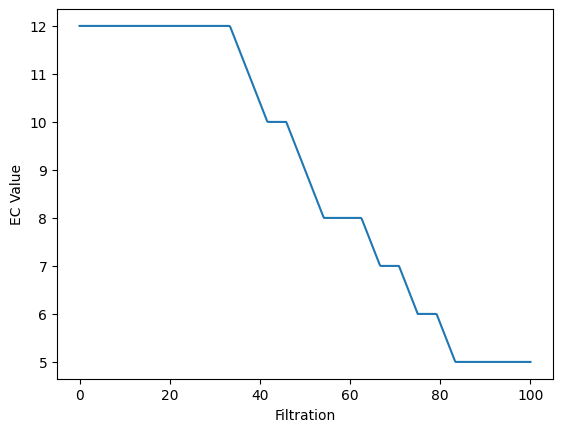

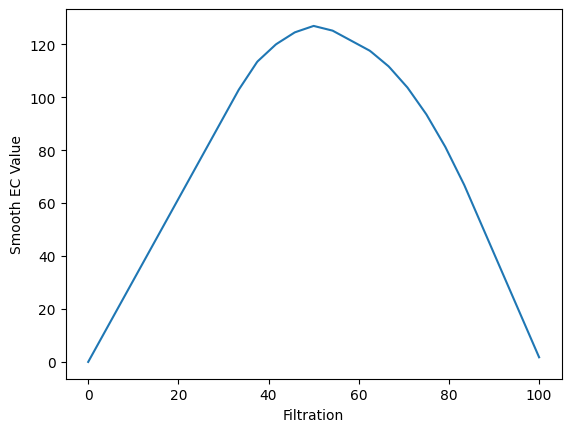

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skfda import FDataGrid
import numpy as np
import pandas as pd
import skfda
# from skfda.representation.interpolation import SplineInterpolation

# Suppose df is your DataFrame
# Columns: "Filtration Value", "Raw EC (3D)", "Smoothed EC (3D)"
filtration = df["Filtration Value"].values
raw_ec = df["Raw EC (3D)"].values
smoothed_ec = df["Smoothed EC (3D)"].values

# For a single function in 1D domain, FDataGrid expects shape (n_samples, n_points)
# If you only have one function, reshape to (1, n_points):
raw_ec_reshaped = raw_ec.reshape(1, -1)

# Similarly for smoothed:
smoothed_ec_reshaped = smoothed_ec.reshape(1, -1)

# Assuming raw_ec_reshaped and smoothed_ec_reshaped are defined
# and filtration is your grid points array

fd_raw = FDataGrid(
    data_matrix=raw_ec_reshaped,
    grid_points=filtration,
    argument_names=("Filtration",),
    coordinate_names=("EC Value",),
)

fd_smoothed = FDataGrid(
    data_matrix=smoothed_ec_reshaped,
    grid_points=filtration,
    argument_names=("Filtration",),
    coordinate_names=("Smooth EC Value",),
)

#
fig1 = fd_raw.plot()
fig2 = fd_smoothed.plot()

# Display all plots
plt.show()


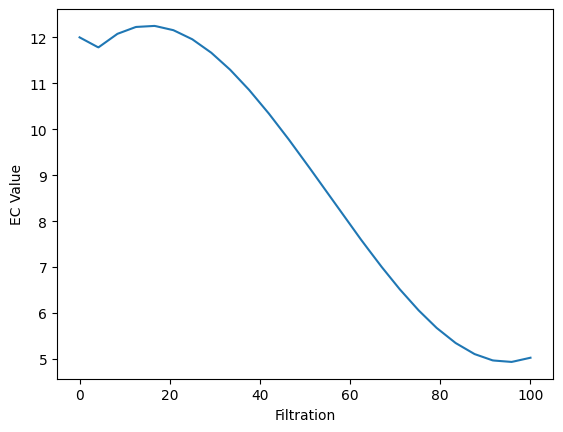

In [4]:
from skfda.representation.basis import BSplineBasis
from skfda.preprocessing.smoothing import BasisSmoother

# Define B-spline basis
n_basis = 10  # Number of basis functions
degree = 4    # Cubic splines
spline_basis = BSplineBasis(n_basis=n_basis, order=degree)

# Fit smoothing
smoother = BasisSmoother(basis=spline_basis)
fd_smoothed_spline = smoother.fit_transform(fd_raw)

# Plot smoothed data
fd_smoothed_spline.plot()
plt.show()


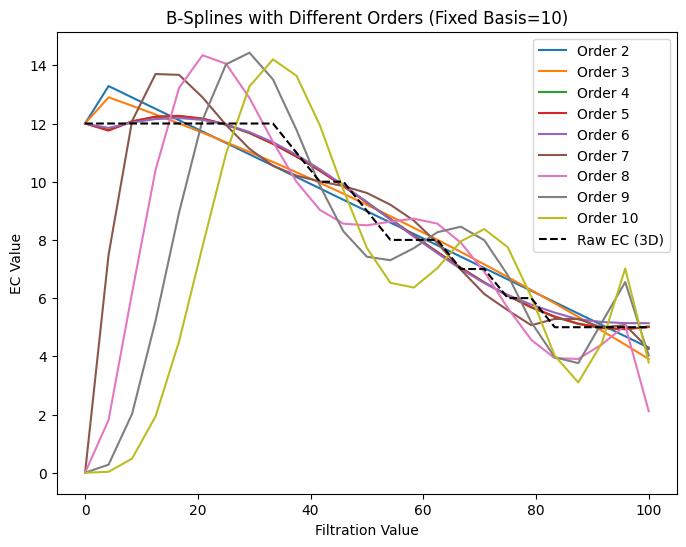

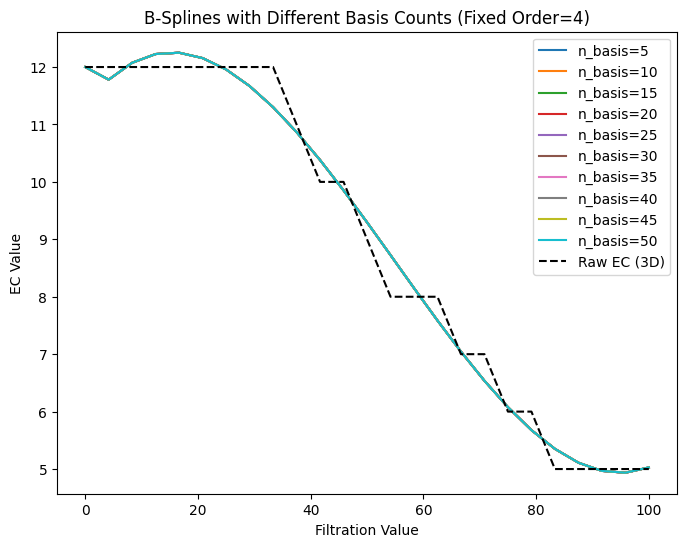

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skfda import FDataGrid
from skfda.representation.basis import BSplineBasis
from skfda.preprocessing.smoothing import BasisSmoother

# Define degrees and basis function counts to test
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Quadratic to quintic splines
n_basis_fixed = 10       # Fixed number of basis functions

basis_counts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]  # Varying basis function count
degree_fixed = 4  # Keep spline order fixed at cubic

# Create figure for varying spline order
fig1, ax1 = plt.subplots(figsize=(8, 6))

for degree in degrees:
    spline_basis = BSplineBasis(n_basis=n_basis_fixed, order=degree)
    smoother = BasisSmoother(basis=spline_basis)
    fd_smooth = smoother.fit_transform(fd_raw)
    
    # Extracting grid points and values for overlay plotting
    filtration_values = fd_smooth.grid_points[0]
    smoothed_values = fd_smooth.data_matrix[0, :, 0]
    
    ax1.plot(filtration_values, smoothed_values, label=f"Order {degree}")

# Plot raw data for reference
ax1.plot(fd_raw.grid_points[0], fd_raw.data_matrix[0, :, 0], 'k--', label="Raw EC (3D)")
ax1.legend()
ax1.set_title(f"B-Splines with Different Orders (Fixed Basis={n_basis_fixed})")
ax1.set_xlabel("Filtration Value")
ax1.set_ylabel("EC Value")

# Create figure for varying number of basis functions
fig2, ax2 = plt.subplots(figsize=(8, 6))

for n_basis in basis_counts:
    spline_basis = BSplineBasis(n_basis=n_basis, order=degree_fixed)
    smoother = BasisSmoother(basis=spline_basis)
    fd_smooth = smoother.fit_transform(fd_raw)
    
    # Extracting grid points and values for overlay plotting
    filtration_values = fd_smooth.grid_points[0]
    smoothed_values = fd_smooth.data_matrix[0, :, 0]
    
    ax2.plot(filtration_values, smoothed_values, label=f"n_basis={n_basis}")

# Plot raw data for reference
ax2.plot(fd_raw.grid_points[0], fd_raw.data_matrix[0, :, 0], 'k--', label="Raw EC (3D)")
ax2.legend()
ax2.set_title(f"B-Splines with Different Basis Counts (Fixed Order={degree_fixed})")
ax2.set_xlabel("Filtration Value")
ax2.set_ylabel("EC Value")

# Show all plots
plt.show()



In [ ]:
batch_spline = BSplineBasis(n_basis=10, order=4)
smoother = BasisSmoother(basis=batch_spline)

csv_paths = list(img_output.glob("*.csv"))
len(csv_paths)

for csv in csv_paths:
    df = pd.read_csv("csv")
    filtration = df["Filtration Value"].values
    raw_ec = df["Raw EC (3D)"].values
    smoothed_ec = df["Smoothed EC (3D)"].values
    spline = smoother.fit_transform(df)

363

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from skfda import FDataGrid
from skfda.representation.basis import BSplineBasis
from skfda.preprocessing.smoothing import BasisSmoother

# Set directories
input_directory = Path("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output")
output_directory = Path("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/spline_scratch")
output_directory.mkdir(parents=True, exist_ok=True)  # Ensure directory exists
# Process all CSV files in the directory
for filename in os.listdir(input_directory):
    if filename.endswith(".csv"):
        file_path = input_directory / filename
        print(f"Processing file: {filename}")  # Debug print

📂 Checking file: chunk_Z0-256_Y0-256_X0-256_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X0-256_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X1200-1456_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X1200-1456_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X1440-1691_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X1440-1691_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X1680-1691_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X1680-1691_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X240-496_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X240-496_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X480-736_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X480-736_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X720-976_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X720-976_filtration.csv...
📂 Checking file: chunk_Z0-256_Y0-256_X960-1216_filtration.csv
✅ Processing chunk_Z0-256_Y0-256_X960-1216_filtration.csv...
📂 Checking file: chunk

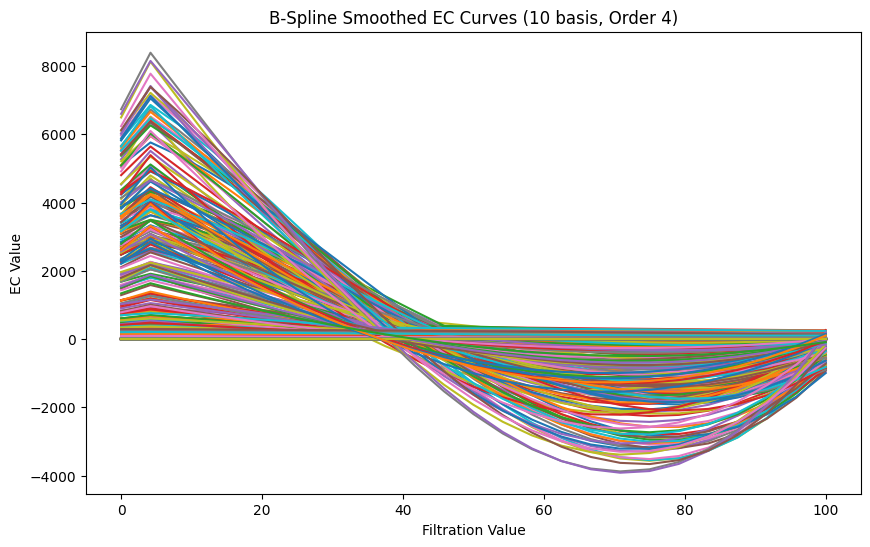

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from skfda import FDataGrid
from skfda.representation.basis import BSplineBasis
from skfda.preprocessing.smoothing import BasisSmoother

# Set directories
input_directory = Path("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/topology_results")
output_directory = Path("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/spline_scratch")
output_directory.mkdir(parents=True, exist_ok=True)  # Ensure output directory exists

# Fixed B-spline parameters
n_basis, order = 10, 4  # Cubic splines

# Prepare figure for plotting all smoothed splines
plt.figure(figsize=(10, 6))

# Track processed files
processed_files = 0

# Process all CSV files in directory
for file_path in input_directory.glob("*.csv"):
    print(f"📂 Checking file: {file_path.name}")  # Explicit message

    try:
        df = pd.read_csv(file_path)

        # Auto-detect required columns
        required_cols = {"Filtration Value", "Raw EC (3D)"}
        available_cols = set(df.columns)
        missing_cols = required_cols - available_cols
        if missing_cols:
            print(f"⚠️ Skipping {file_path.name}: Missing columns {missing_cols}")
            continue  # Skip file

        print(f"✅ Processing {file_path.name}...")  # Confirm processing

        # Extract data
        filtration, raw_ec = df["Filtration Value"].values, df["Raw EC (3D)"].values.reshape(1, -1)
        if not filtration.size or not raw_ec.size:
            print(f"⚠️ Skipping {file_path.name}: Empty data")
            continue  # Skip file

        # Create functional data object
        fd_raw = FDataGrid(data_matrix=raw_ec, grid_points=filtration)

        # Apply B-spline smoothing
        smoother = BasisSmoother(basis=BSplineBasis(n_basis=n_basis, order=order))
        fd_smoothed = smoother.fit_transform(fd_raw)

        # Extract smoothed values
        smoothed_values = fd_smoothed.data_matrix[0, :, 0]

        # Plot smoothed splines (NO LEGEND)
        plt.plot(filtration, smoothed_values)

        # Save smoothed results
        df["Smoothed EC (3D)"] = smoothed_values
        df.to_csv(output_directory / f"smoothed_{file_path.name}", index=False)

        processed_files += 1

    except Exception as e:
        print(f"❌ Error processing {file_path.name}: {e}")

# Finalize plot (NO LEGEND)
if processed_files:
    plt.title(f"B-Spline Smoothed EC Curves ({n_basis} basis, Order {order})")
    plt.xlabel("Filtration Value")
    plt.ylabel("EC Value")
    plt.show()
else:
    print("🚨 No valid files processed. Check file formats and column names.")


📂 Processing folder: spline_scratch
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X0-256_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X1200-1456_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X1440-1691_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X1680-1691_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X240-496_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X480-736_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X720-976_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y0-256_X960-1216_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y1200-1456_X0-256_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y1200-1456_X1200-1456_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y1200-1456_X1440-1691_filtration.csv
   📄 Processing file: smoothed_chunk_Z0-256_Y1200-1456_X1680-1691_filtration.csv
   📄 Processing file: smoothed_chunk_Z0

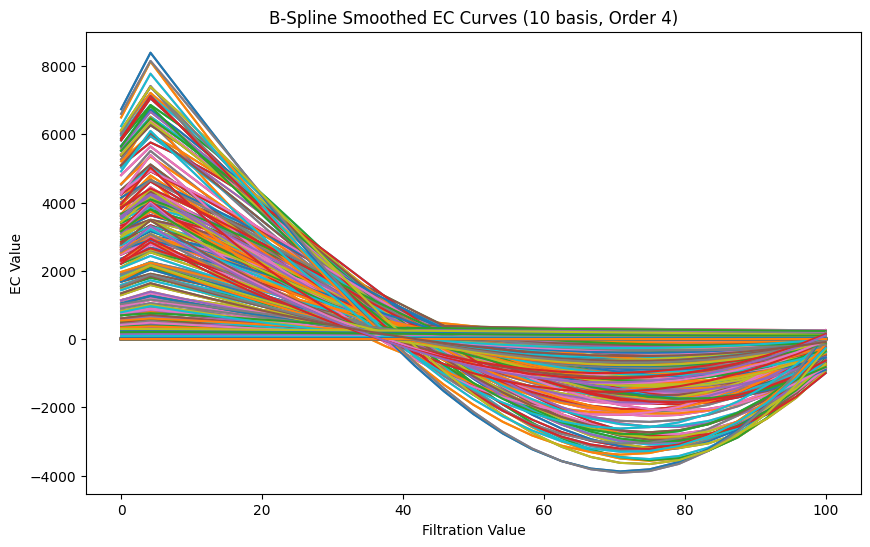

✅ Functional data objects saved for FPCA at D:\tda_workflow\_post_pointcloud_demo\alpha_raw+SECT__output\spline_scratch/functional_data.pkl


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from skfda import FDataGrid
from skfda.representation.basis import BSplineBasis
from skfda.preprocessing.smoothing import BasisSmoother

# Set base directory (where multiple sample folders exist)
base_directory = Path("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output")
output_directory = Path("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/spline_scratch")
output_directory.mkdir(parents=True, exist_ok=True)  # Ensure output directory exists

# Fixed B-spline parameters
n_basis, order = 10, 4  # Cubic splines

# Prepare figure for plotting all smoothed splines
plt.figure(figsize=(10, 6))

# Track processed files
processed_files = 0
functional_data_list = []  # Store processed FDataGrid objects for FPCA later

# Process all CSV files from multiple folders
for subfolder in base_directory.iterdir():
    if not subfolder.is_dir():  # Skip non-folder files
        continue

    sample_identifier = subfolder.name  # Use folder name as identifier
    print(f"📂 Processing folder: {sample_identifier}")

    for file_path in subfolder.glob("*.csv"):
        print(f"   📄 Processing file: {file_path.name}")

        try:
            df = pd.read_csv(file_path)

            # Auto-detect required columns
            required_cols = {"Filtration Value", "Raw EC (3D)"}
            available_cols = set(df.columns)
            missing_cols = required_cols - available_cols
            if missing_cols:
                print(f"   ⚠️ Skipping {file_path.name}: Missing columns {missing_cols}")
                continue

            # Extract data
            filtration, raw_ec = df["Filtration Value"].values, df["Raw EC (3D)"].values.reshape(1, -1)
            if not filtration.size or not raw_ec.size:
                print(f"   ⚠️ Skipping {file_path.name}: Empty data")
                continue

            # Create functional data object with identifier
            fd_raw = FDataGrid(data_matrix=raw_ec, grid_points=filtration)

            # Apply B-spline smoothing
            smoother = BasisSmoother(basis=BSplineBasis(n_basis=n_basis, order=order))
            fd_smoothed = smoother.fit_transform(fd_raw)

            # Extract smoothed values
            smoothed_values = fd_smoothed.data_matrix[0, :, 0]

            # Store functional data object for later FPCA
            fd_smoothed.dataset_name = sample_identifier
            functional_data_list.append((sample_identifier, fd_smoothed))

            # Plot smoothed splines (NO LEGEND)
            plt.plot(filtration, smoothed_values)

            # Save smoothed results with identifier
            df["Smoothed EC (3D)"] = smoothed_values
            df["Sample Identifier"] = sample_identifier  # Add sample ID column
            df.to_csv(output_directory / f"smoothed_{sample_identifier}_{file_path.name}", index=False)

            processed_files += 1

        except Exception as e:
            print(f"   ❌ Error processing {file_path.name}: {e}")

# Finalize plot (NO LEGEND)
if processed_files:
    plt.title(f"B-Spline Smoothed EC Curves ({n_basis} basis, Order {order})")
    plt.xlabel("Filtration Value")
    plt.ylabel("EC Value")
    plt.show()
else:
    print("🚨 No valid files processed. Check file formats and column names.")

# Optional: Save processed functional data objects for FPCA
import pickle
with open(output_directory / "functional_data.pkl", "wb") as f:
    pickle.dump(functional_data_list, f)
print(f"✅ Functional data objects saved for FPCA at {output_directory}/functional_data.pkl")


In [18]:
import pickle
from skfda.preprocessing.dim_reduction.projection import FPCA

# Load functional data
with open("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/spline_scratch/functional_data.pkl", "rb") as f:
    functional_data_list = pickle.load(f)

# Extract functional data objects
sample_ids, fd_objects = zip(*functional_data_list)

# Stack into a single FDataGrid object
fd_stacked = fd_objects[0].concatenate(*fd_objects[1:])

# Apply Functional PCA
fpca = FPCA(n_components=3)  # Keep 3 principal components
fd_transformed = fpca.fit_transform(fd_stacked)

# Print variance explained
print(f"Explained variance ratio: {fpca.explained_variance_ratio_}")


Explained variance ratio: [0.97757187 0.01683674 0.0051557 ]


C:\Users\g7712_razer2\AppData\Local\Temp\ipykernel_35704\3005108194.py:2: DeprecationWarning: The module "projection" is deprecated. Please use "dim_reduction"
  from skfda.preprocessing.dim_reduction.projection import FPCA


In [20]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from skfda.preprocessing.dim_reduction.projection import FPCA

# Load functional data
with open("D:/tda_workflow/_post_pointcloud_demo/alpha_raw+SECT__output/spline_scratch/functional_data.pkl", "rb") as f:
    functional_data_list = pickle.load(f)

# Extract sample IDs and functional data objects
sample_ids, fd_objects = zip(*functional_data_list)

# Stack into a single FDataGrid object for FPCA
fd_stacked = fd_objects[0].concatenate(*fd_objects[1:])

# Apply Functional PCA
n_components = 3  # Use the first 3 principal components
fpca = FPCA(n_components=n_components)
fpca.fit(fd_stacked)
fd_transformed = fpca.transform(fd_stacked)

# Print variance explained
print(f"Explained variance ratio: {fpca.explained_variance_ratio_}")



Explained variance ratio: [0.97757187 0.01683674 0.0051557 ]


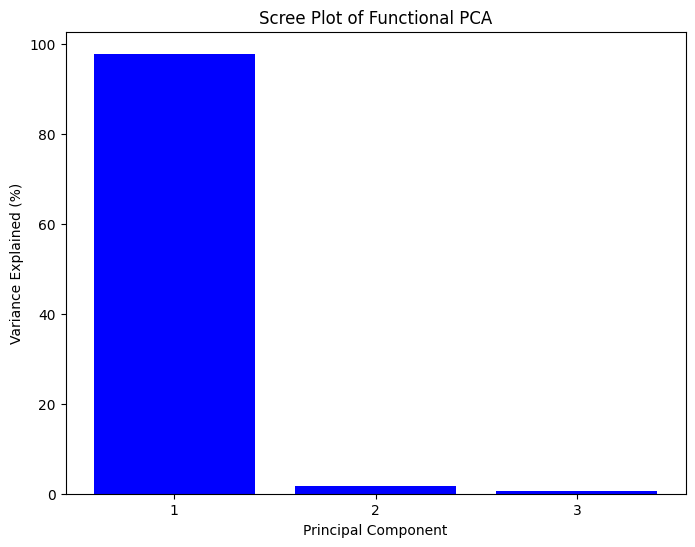

In [21]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), fpca.explained_variance_ratio_ * 100, color="blue")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Scree Plot of Functional PCA")
plt.xticks(range(1, n_components + 1))
plt.show()


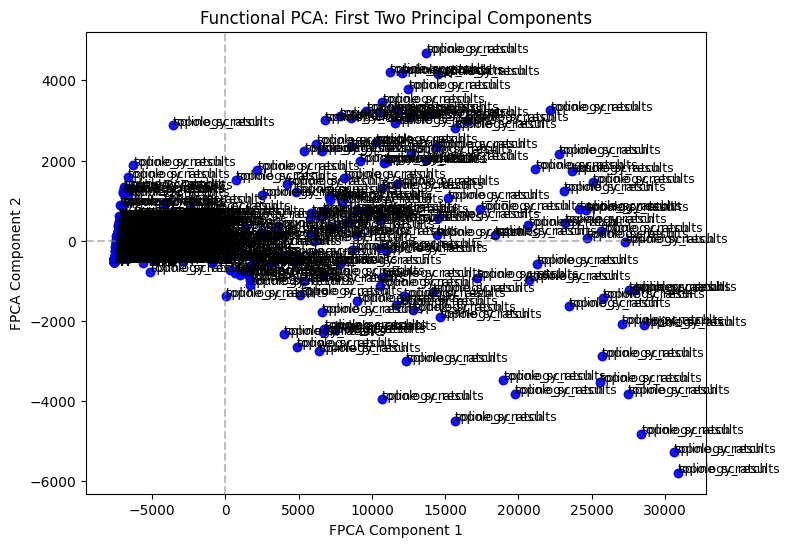

In [22]:
fpca_scores = fd_transformed[:, :2]  # First two principal components

plt.figure(figsize=(8, 6))
plt.scatter(fpca_scores[:, 0], fpca_scores[:, 1], c="blue", alpha=0.7)

# Annotate each point with the sample identifier
for i, sample_id in enumerate(sample_ids):
    plt.text(fpca_scores[i, 0], fpca_scores[i, 1], sample_id, fontsize=9)

plt.xlabel("FPCA Component 1")
plt.ylabel("FPCA Component 2")
plt.title("Functional PCA: First Two Principal Components")
plt.axhline(0, linestyle="--", color="gray", alpha=0.5)
plt.axvline(0, linestyle="--", color="gray", alpha=0.5)
plt.show()


<Figure size 800x600 with 0 Axes>

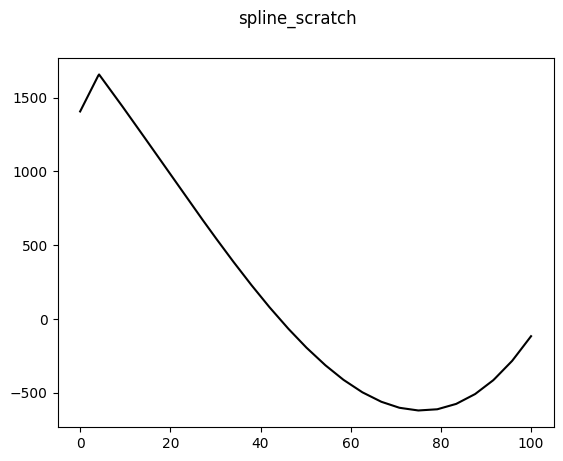

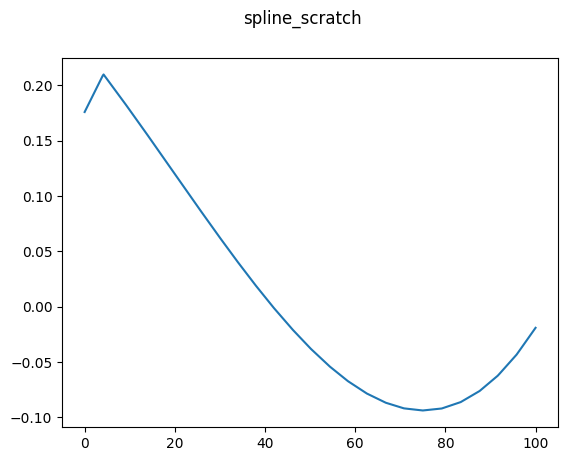

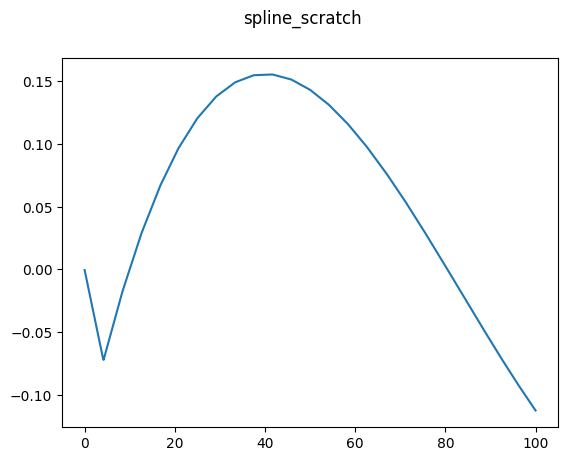

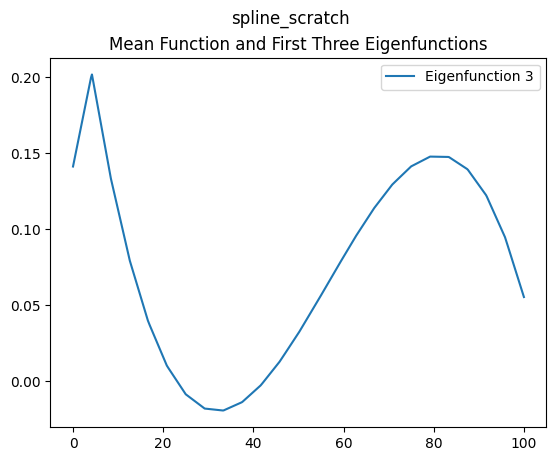

In [23]:
plt.figure(figsize=(8, 6))

# Plot mean function
fd_stacked.mean().plot(label="Mean Function", color="black")

# Plot first three eigenfunctions
for i in range(n_components):
    fpca.components_[i].plot(label=f"Eigenfunction {i+1}")

plt.title("Mean Function and First Three Eigenfunctions")
plt.legend()
plt.show()


In [24]:
plt.figure(figsize=(8, 6))

# Reconstruct function using the first two components
fd_reconstructed = fpca.inverse_transform(fd_transformed[:, :2])

# Plot original and reconstructed function for the first sample
fd_stacked[0].plot(label="Original Function", linestyle="dotted", color="black")
fd_reconstructed[0].plot(label="Reconstructed Function (2 PCs)", color="red")

plt.title("Original vs. Reconstructed Function (First 2 FPCA Components)")
plt.legend()
plt.show()


AttributeError: pc_scores must be a numpy array with n_samples rows and n_components columns.

<Figure size 800x600 with 0 Axes>